In [1]:
import pandas as pd
import numpy as np

metadata = {
    "# of trips": 0, 
    "# of depots": 0, 
    "# of EB types": 0, 
    "# of terminals": 0, 
    "minimum layover time (mins)": 0,
    "EB battery size (kWh)": 0,
    "charging rate (kWh/min)": 0,
    "electricity price ($/kWh)": 0,
    "SoC_max": 0,
    "SoC_min": 0,
    "# of intervals": 1,
    "monetary_cost per kWh_1": 1,
    "monetary_cost per kWh_2": 1,
    "monetary_cost per kWh_3": 1,
    "monetary_cost per kWh_4": 1,
    "depot name": 2,
    "EB types": 3,
    "terminal name": 4,
    "SINGLE Fixed cost": 5,
    "DOUBLE Fixed cost": 5,
    "SINGLE energy consumption rate (kWh/km)": 6,
    "DOUBLE energy consumption rate (kWh/km)": 6,
    "BB-BB terminal deadhead time matrix": 7,
    "BB-MC terminal deadhead time matrix": 7,
    "MC-BB terminal deadhead time matrix": 8,
    "MC-MC terminal deadhead time matrix": 8,
    "BB-BB terminal deadhead distance matrix": 9,
    "BB-MC terminal deadhead distance matrix": 9,
    "MC-BB terminal deadhead distance matrix": 10,
    "MC-MC terminal deadhead distance matrix": 10,
    "depot-terminal BB deadhead time matrix": 11,
    "depot-terminal MC deadhead time matrix": 11,
    "depot-terminal BB deadhead distance matrix": 12,
    "depot-terminal MC deadhead distance matrix": 12,
    "available # of SINGLE EB types per depot": 13,
    "available # of DOUBLE EB types per depot": 13
}
env = {}

filename = r"./D1_R2_T30.txt"
with open(filename, "r") as f:
    content = f.readlines()

dataset = []
for idx, line in enumerate(content):
    columns = list(map(lambda x: x[0], filter(lambda item: item[1] == idx, metadata.items())))
    data = line.split("	")
    # print(data)
    # print(columns)
    if len(data) == len(columns):
        for col, d in zip(columns, data):
            env[col] = d.split("\n")[0] if "\n" in d else d
    else:
        if len(data) > 9:
            data = [d.split("\n")[0] if "\n" in d else d for d in data]
            dataset.append(data)
        else:
            env[columns[0]] = data

    
columns = [
    "tripID",
    "routeName",
    "length",
    "dep_term",
    "arr_term",
    "dep_time",
    "arr_time",
    "dep_time_mins",
    "arr_time_mins",
    "PEAK?"
]

print(f"env = {env}")
df = pd.DataFrame(data=dataset, columns=columns)
df['tripID'] = df['tripID'].astype(int)
df['routeName'] = df['routeName'].astype(int)
df['length'] = df['length'].astype(float)
df['dep_time_mins'] = df['dep_time_mins'].astype(int)
df['arr_time_mins'] = df['arr_time_mins'].astype(int)
df['type'] = 'trip'
df['duration(mins)'] = df.apply(lambda x: x['arr_time_mins'] - x['dep_time_mins'], axis=1)
print(df)
CHARGING_TIME = 50
terminals = {}
for i in range(int(env['# of terminals'])):
    if "\n" in env['terminal name'][i]:
        env['terminal name'][i] = env['terminal name'][i].split("\n")[0]
    terminals[env['terminal name'][i]] = {'max_interval' : int(env['minimum layover time (mins)'])}
    
charging_stations2 = {
    len(df)+1: {'name': 'CS1bb', 'duration': CHARGING_TIME,  'dep_time': 0, 'arr_time': 1440, 'dep_term': 'Bukit_Batok', 'arr_term': 'Bukit_Batok'},
    len(df)+2: {'name': 'CS2mc', 'duration': CHARGING_TIME,  'dep_time': 0, 'arr_time': 1440, 'dep_term': 'Marina_Center', 'arr_term': 'Marina_Center'},
}

charging_stations = [
    [len(df)+1,'-', '-', 'Bukit_Batok', 'Bukit_Batok', '-', '-', 0, 1440, 'FALSE', 'cs', CHARGING_TIME],
    [len(df)+2, '-', '-', 'Marina_Center', 'Marina_Center', '-', '-', 0, 1440, 'FALSE', 'cs', CHARGING_TIME],
]
### Assuming single type of eBus energy consumption rate = 2 kWh/km
### EB Battery Size = 200 kWh
####### Therefore, the total minimum SoC per km => (200 - 0.1(200)) / 2 => 90 km
### Charging Rate = 5 kWh/min
### SoC min = 0.1 (20kWh)
## D_MAX = 150
cs_deadheads = {
    "Bukit_Batok": {"Bukit_Batok": 0, "Marina_Center": 28},
    "Marina_Center": {"Bukit_Batok": 22, "Marina_Center": 0}
}
CHARGING_TIME = 36 # (200 - 0.1(200)) / 5 => 36mins


env = {'# of trips': '30', '# of depots': '1', '# of EB types': '2', '# of terminals': '2', 'minimum layover time (mins)': '5', 'EB battery size (kWh)': '200', 'charging rate (kWh/min)': '5', 'electricity price ($/kWh)': '0.3', 'SoC_max': '0.9', 'SoC_min': '0.1', '# of intervals': '4', 'monetary_cost per kWh_1': '0.48', 'monetary_cost per kWh_2': '0.52', 'monetary_cost per kWh_3': '0.58', 'monetary_cost per kWh_4': '0.79', 'depot name': 'Bulim', 'EB types': ['single', 'double\n'], 'terminal name': ['Bukit_Batok', 'Marina_Center\n'], 'SINGLE Fixed cost': '200', 'DOUBLE Fixed cost': '300', 'SINGLE energy consumption rate (kWh/km)': '2', 'DOUBLE energy consumption rate (kWh/km)': '3 ', 'BB-BB terminal deadhead time matrix': '0', 'BB-MC terminal deadhead time matrix': '28', 'MC-BB terminal deadhead time matrix': '22', 'MC-MC terminal deadhead time matrix': '0', 'BB-BB terminal deadhead distance matrix': '0', 'BB-MC terminal deadhead distance matrix': '26.6', 'MC-BB terminal deadhead distan

In [2]:
df

,tripID,routeName,length,dep_term,arr_term,dep_time,arr_time,dep_time_mins,arr_time_mins,PEAK?,type,duration(mins)
0,1,77,18.7,Bukit_Batok,Marina_Center,5:45,6:47,345,407,FALSE,trip,62
1,2,77,18.7,Marina_Center,Bukit_Batok,5:45,6:47,345,407,FALSE,trip,62
2,3,173,13.2,Bukit_Batok,Bukit_Batok,6:00,6:44,360,404,FALSE,trip,44
3,4,77,18.7,Bukit_Batok,Marina_Center,6:15,7:17,375,437,FALSE,trip,62
4,5,77,18.7,Marina_Center,Bukit_Batok,6:15,7:17,375,437,FALSE,trip,62
5,6,173,13.2,Bukit_Batok,Bukit_Batok,6:30,7:14,390,434,FALSE,trip,44
6,7,77,18.7,Bukit_Batok,Marina_Center,6:45,7:47,405,467,FALSE,trip,62
7,8,77,18.7,Marina_Center,Bukit_Batok,6:45,7:47,405,467,FALSE,trip,62
8,9,173,13.2,Bukit_Batok,Bukit_Batok,7:00,7:44,420,464,TRUE,trip,44
9,10,77,18.7,Bukit_Batok,Marina_Center,7:15,8:17,435,497,TRUE,trip,62


In [3]:
columns = [
    "tripID",
    "routeName",
    "length",
    "dep_term",
    "arr_term",
    "dep_time",
    "arr_time",
    "dep_time_mins",
    "arr_time_mins",
    "PEAK?",
    "type",
    "duration(mins)"
]

In [4]:
depot = [
    [0,'-', '-', '-', '-', '-', '-', 0, 1440, 'FALSE', 'depot', 0],
]
depot_df = pd.DataFrame(depot, columns=columns)
depot_df

,tripID,routeName,length,dep_term,arr_term,dep_time,arr_time,dep_time_mins,arr_time_mins,PEAK?,type,duration(mins)
0,0,-,-,-,-,-,-,0,1440,FALSE,depot,0


In [5]:
# columns = columns + ["duration(mins)"]
# columns
cs_df = pd.DataFrame(charging_stations, columns=columns)
all_df = pd.concat([depot_df, df, cs_df], ignore_index=True)
all_df

,tripID,routeName,length,dep_term,arr_term,dep_time,arr_time,dep_time_mins,arr_time_mins,PEAK?,type,duration(mins)
0,0,-,-,-,-,-,-,0,1440,FALSE,depot,0
1,1,77,18.7,Bukit_Batok,Marina_Center,5:45,6:47,345,407,FALSE,trip,62
2,2,77,18.7,Marina_Center,Bukit_Batok,5:45,6:47,345,407,FALSE,trip,62
3,3,173,13.2,Bukit_Batok,Bukit_Batok,6:00,6:44,360,404,FALSE,trip,44
4,4,77,18.7,Bukit_Batok,Marina_Center,6:15,7:17,375,437,FALSE,trip,62
5,5,77,18.7,Marina_Center,Bukit_Batok,6:15,7:17,375,437,FALSE,trip,62
6,6,173,13.2,Bukit_Batok,Bukit_Batok,6:30,7:14,390,434,FALSE,trip,44
7,7,77,18.7,Bukit_Batok,Marina_Center,6:45,7:47,405,467,FALSE,trip,62
8,8,77,18.7,Marina_Center,Bukit_Batok,6:45,7:47,405,467,FALSE,trip,62
9,9,173,13.2,Bukit_Batok,Bukit_Batok,7:00,7:44,420,464,TRUE,trip,44


In [6]:
cs_df

,tripID,routeName,length,dep_term,arr_term,dep_time,arr_time,dep_time_mins,arr_time_mins,PEAK?,type,duration(mins)
0,31,-,-,Bukit_Batok,Bukit_Batok,-,-,0,1440,FALSE,cs,50
1,32,-,-,Marina_Center,Marina_Center,-,-,0,1440,FALSE,cs,50


In [7]:
terminals

{'Bukit_Batok': {'max_interval': 5}, 'Marina_Center': {'max_interval': 5}}

In [8]:
def feasible_pairs(data, terminals=terminals):
    bus_data = data.copy(deep=True)
    bus_data['index'] = bus_data['tripID']
    bus_data.set_index("index", inplace=True)
    # bus_data = bus_data.reset_index()
    # bus_data.rename(columns={'index': 'trip_id'}, inplace=True)
    # bus_data.index = np.arange(0, len(data))
    print(bus_data)
    ### duration (delta)
    duration_trips = (
        #lambda pair: bus_data.loc[pair[1], "duration"] + bus_data.loc[pair[0], 'duration'] if not (bus_data.loc[pair[1], 'type'] == 'depot' or bus_data.loc[pair[0], 'type'] == 'depot') else bus_data.loc[pair[1], "duration"]  if bus_data.loc[pair[0], 'type'] == 'depot' else 0 #+ bus_data.loc[pair[0], "duration"] if not (bus_data.loc[pair[0], 'type'] == 'depot' or bus_data.loc[pair[1], "type"] == 'depot') else 0
        lambda pair: (16 if bus_data.loc[pair[1], "dep_term"] == "Bukit_Batok" else 32) if pair[0] == 0 else (32 if bus_data.loc[pair[0], "dep_term"] == "Bukit_Batok" else 16) if pair[1] == 0 else (bus_data.loc[pair[1], "duration(mins)"])
        #if not (bus_data.loc[pair[1], 'type'] == 'depot') else bus_data.loc[pair[0], "duration"] 
    )
    connected_trips = (
        lambda pair: bus_data.loc[pair[1], "dep_time_mins"] - bus_data.loc[pair[0], "arr_time_mins"]
        # lambda pair: bus_data.loc[pair[1], 'trip_id'] != bus_data.loc[pair[0], 'trip_id']
    )
    pairs = filter(
        # lambda pair: (bus_data.loc[pair[0], 'type'] == 'depot' or bus_data.loc[pair[1], "type"] == 'depot') or (connected_trips(pair) >= terminals[bus_data.loc[pair[1], "arr_term"]]["max_interval"] and bus_data.loc[pair[0], "arr_term"] == bus_data.loc[pair[1], "dep_term"]),
        # [(i,j) for i in bus_data.index for j in bus_data.index if i != j],
        lambda pair: (
            (pair[0] == 0 or pair[1] == 0) or
            (connected_trips(pair) >= terminals[bus_data.loc[pair[1], "arr_term"]]['max_interval'] and bus_data.loc[pair[0], "arr_term"] == bus_data.loc[pair[1], "dep_term"]) or 
            (connected_trips(pair) >= (terminals[bus_data.loc[pair[1], "arr_term"]]['max_interval'] + cs_deadheads[bus_data.loc[pair[0], "arr_term"]][bus_data.loc[pair[1], "dep_term"]]) and bus_data.loc[pair[0], "arr_term"] != bus_data.loc[pair[1], "dep_term"])
        ), 
        [(i,j) for i in range(len(bus_data)+1) for j in range(len(bus_data)+1) if i != j]
    )
    return {pair: {'duration': duration_trips(pair)} for pair in pairs}
# ## Creating Gamma and Delta
# print(feasible_pairs(trips_df, terminals=terminals))
arcs = feasible_pairs(df, terminals=terminals)

       tripID  routeName  length       dep_term       arr_term dep_time  \
index                                                                     
1           1         77    18.7    Bukit_Batok  Marina_Center     5:45   
2           2         77    18.7  Marina_Center    Bukit_Batok     5:45   
3           3        173    13.2    Bukit_Batok    Bukit_Batok     6:00   
4           4         77    18.7    Bukit_Batok  Marina_Center     6:15   
5           5         77    18.7  Marina_Center    Bukit_Batok     6:15   
6           6        173    13.2    Bukit_Batok    Bukit_Batok     6:30   
7           7         77    18.7    Bukit_Batok  Marina_Center     6:45   
8           8         77    18.7  Marina_Center    Bukit_Batok     6:45   
9           9        173    13.2    Bukit_Batok    Bukit_Batok     7:00   
10         10         77    18.7    Bukit_Batok  Marina_Center     7:15   
11         11         77    18.7  Marina_Center    Bukit_Batok     7:15   
12         12        173 

In [9]:
arcs

{(0, 1): {'duration': 16},
 (0, 2): {'duration': 32},
 (0, 3): {'duration': 16},
 (0, 4): {'duration': 16},
 (0, 5): {'duration': 32},
 (0, 6): {'duration': 16},
 (0, 7): {'duration': 16},
 (0, 8): {'duration': 32},
 (0, 9): {'duration': 16},
 (0, 10): {'duration': 16},
 (0, 11): {'duration': 32},
 (0, 12): {'duration': 16},
 (0, 13): {'duration': 16},
 (0, 14): {'duration': 32},
 (0, 15): {'duration': 16},
 (0, 16): {'duration': 16},
 (0, 17): {'duration': 32},
 (0, 18): {'duration': 16},
 (0, 19): {'duration': 16},
 (0, 20): {'duration': 32},
 (0, 21): {'duration': 16},
 (0, 22): {'duration': 16},
 (0, 23): {'duration': 32},
 (0, 24): {'duration': 16},
 (0, 25): {'duration': 16},
 (0, 26): {'duration': 32},
 (0, 27): {'duration': 16},
 (0, 28): {'duration': 16},
 (0, 29): {'duration': 16},
 (0, 30): {'duration': 16},
 (1, 0): {'duration': 32},
 (1, 10): {'duration': 62},
 (1, 11): {'duration': 62},
 (1, 12): {'duration': 44},
 (1, 13): {'duration': 62},
 (1, 14): {'duration': 62},
 (

In [10]:
for i in range(31):
    count = 0
    for arc in arcs.keys():
        if i == arc[0]:
            count += 1
    print(f"Total number of feasible {i}: {count}")

Total number of feasible 0: 30
Total number of feasible 1: 22
Total number of feasible 2: 22
Total number of feasible 3: 22
Total number of feasible 4: 19
Total number of feasible 5: 19
Total number of feasible 6: 19
Total number of feasible 7: 16
Total number of feasible 8: 16
Total number of feasible 9: 16
Total number of feasible 10: 13
Total number of feasible 11: 13
Total number of feasible 12: 13
Total number of feasible 13: 10
Total number of feasible 14: 10
Total number of feasible 15: 10
Total number of feasible 16: 7
Total number of feasible 17: 7
Total number of feasible 18: 7
Total number of feasible 19: 4
Total number of feasible 20: 5
Total number of feasible 21: 5
Total number of feasible 22: 3
Total number of feasible 23: 4
Total number of feasible 24: 4
Total number of feasible 25: 2
Total number of feasible 26: 3
Total number of feasible 27: 3
Total number of feasible 28: 2
Total number of feasible 29: 1
Total number of feasible 30: 1


In [11]:
def feasible_recharge(data, gamma, recharge=charging_stations2):
    bus_data = data.copy(deep=True)
    bus_data['index'] = bus_data['tripID']
    bus_data.set_index("index", inplace=True)
    print(bus_data)
    ### duration (delta)
    connected_trips = (
        lambda pair: bus_data.loc[pair[1], "dep_time_mins"] - bus_data.loc[pair[0], "arr_time_mins"]
        # lambda pair: bus_data.loc[pair[1], 'trip_id'] != bus_data.loc[pair[0], 'trip_id']
    )
    ### duration (delta)
    duration_trips = (
        lambda pair: connected_trips(pair) - (recharge[pair[2]]['duration'])
    )
    ## feasible (phi)
    pairs = filter(
        lambda pair: (
            (pair[0] != 0 and pair[1] != 0) and
            ((connected_trips(pair) >= CHARGING_TIME and bus_data.loc[pair[0], "arr_term"] == bus_data.loc[pair[1], "dep_term"]) or 
            (connected_trips(pair) >= (CHARGING_TIME + cs_deadheads[bus_data.loc[pair[0], "arr_term"]][bus_data.loc[pair[1], "dep_term"]]) and bus_data.loc[pair[0], "arr_term"] != bus_data.loc[pair[1], "dep_term"]))
        ), 
        [(i,j,k) for k in recharge.keys() for i in range(len(bus_data)+1) for j in range(len(bus_data)+1) if i != j]
        
#         lambda pair: (bus_data.loc[pair[0], 'type'] != 'depot' and bus_data.loc[pair[1], "type"] != 'depot') and ((connected_trips(pair) >= (recharge[pair[2]]['duration']))),
#         [(i,j,k) for k in recharge.keys() for i in bus_data.index for j in bus_data.index if i != j],
    )
    return {pair: {'duration': duration_trips(pair)} for pair in pairs}

recharge_2cs_arcs = feasible_recharge(df, cs_deadheads, recharge=charging_stations2)
print(recharge_2cs_arcs)
cs_ids = set(list(charging_stations2.keys()))
# all_schedules_2cs = {**trips, **charging_stations2}
# all_schs_2cs = pd.DataFrame.from_dict(all_schedules_2cs, orient='index')
# all_schs_2cs['ID'] = range(len(all_schs_2cs))
# durations_2cs = {idx: {'duration': all_schs_2cs.loc[idx, 'duration']} for idx in all_schs_2cs.index if idx != 0}
recharge_2cs_arcs

       tripID  routeName  length       dep_term       arr_term dep_time  \
index                                                                     
1           1         77    18.7    Bukit_Batok  Marina_Center     5:45   
2           2         77    18.7  Marina_Center    Bukit_Batok     5:45   
3           3        173    13.2    Bukit_Batok    Bukit_Batok     6:00   
4           4         77    18.7    Bukit_Batok  Marina_Center     6:15   
5           5         77    18.7  Marina_Center    Bukit_Batok     6:15   
6           6        173    13.2    Bukit_Batok    Bukit_Batok     6:30   
7           7         77    18.7    Bukit_Batok  Marina_Center     6:45   
8           8         77    18.7  Marina_Center    Bukit_Batok     6:45   
9           9        173    13.2    Bukit_Batok    Bukit_Batok     7:00   
10         10         77    18.7    Bukit_Batok  Marina_Center     7:15   
11         11         77    18.7  Marina_Center    Bukit_Batok     7:15   
12         12        173 

{(1, 13, 31): {'duration': 8},
 (1, 14, 31): {'duration': 8},
 (1, 15, 31): {'duration': 23},
 (1, 16, 31): {'duration': 38},
 (1, 17, 31): {'duration': 38},
 (1, 18, 31): {'duration': 53},
 (1, 19, 31): {'duration': 68},
 (1, 20, 31): {'duration': 68},
 (1, 21, 31): {'duration': 83},
 (1, 22, 31): {'duration': 98},
 (1, 23, 31): {'duration': 98},
 (1, 24, 31): {'duration': 113},
 (1, 25, 31): {'duration': 128},
 (1, 26, 31): {'duration': 128},
 (1, 27, 31): {'duration': 143},
 (1, 28, 31): {'duration': 173},
 (1, 29, 31): {'duration': 203},
 (1, 30, 31): {'duration': 233},
 (2, 12, 31): {'duration': -7},
 (2, 13, 31): {'duration': 8},
 (2, 15, 31): {'duration': 23},
 (2, 16, 31): {'duration': 38},
 (2, 17, 31): {'duration': 38},
 (2, 18, 31): {'duration': 53},
 (2, 19, 31): {'duration': 68},
 (2, 20, 31): {'duration': 68},
 (2, 21, 31): {'duration': 83},
 (2, 22, 31): {'duration': 98},
 (2, 23, 31): {'duration': 98},
 (2, 24, 31): {'duration': 113},
 (2, 25, 31): {'duration': 128},
 (

In [12]:
charging_stations2.keys()

dict_keys([31, 32])

In [58]:
from itertools import chain
import pandas as pd
import time
import matplotlib.pyplot as plt
max_it = 10
from misc import vectorSchRepresentation, feasible_pairs, feasible_recharge, visualizeResult, visualizeSolution, drawBusTrips
from chs import constructiveScheduler
from sa import annealing, get_total_gap

In [59]:
all_df['duration'] = all_df['duration(mins)']

In [60]:
all_schs = all_df[['tripID', 'type', 'duration', 'dep_time_mins', 'arr_time_mins', 'dep_term', 'arr_term']]

In [61]:
all_schs['name'] = all_schs.apply(lambda x: x['arr_term'][0] + x['dep_term'][0] + str(x['tripID']) if x['type'] == 'trip' else "DEPOT" if x['type'] == 'depot' else charging_stations2[x['tripID']]['name'],axis=1)
all_schs

C:\Users\gozalid\AppData\Local\Temp\ipykernel_15044\1487391096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_schs['name'] = all_schs.apply(lambda x: x['arr_term'][0] + x['dep_term'][0] + str(x['tripID']) if x['type'] == 'trip' else "DEPOT" if x['type'] == 'depot' else charging_stations2[x['tripID']]['name'],axis=1)


,tripID,type,duration,dep_time_mins,arr_time_mins,dep_term,arr_term,name
0,0,depot,0,0,1440,-,-,DEPOT
1,1,trip,62,345,407,Bukit_Batok,Marina_Center,MB1
2,2,trip,62,345,407,Marina_Center,Bukit_Batok,BM2
3,3,trip,44,360,404,Bukit_Batok,Bukit_Batok,BB3
4,4,trip,62,375,437,Bukit_Batok,Marina_Center,MB4
5,5,trip,62,375,437,Marina_Center,Bukit_Batok,BM5
6,6,trip,44,390,434,Bukit_Batok,Bukit_Batok,BB6
7,7,trip,62,405,467,Bukit_Batok,Marina_Center,MB7
8,8,trip,62,405,467,Marina_Center,Bukit_Batok,BM8
9,9,trip,44,420,464,Bukit_Batok,Bukit_Batok,BB9


In [62]:
all_schs.rename(columns={'tripID': 'ID', 'dep_time_mins': 'dep_time', 'arr_time_mins': 'arr_time'}, inplace=True)

C:\Users\gozalid\AppData\Local\Temp\ipykernel_15044\3169333093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_schs.rename(columns={'tripID': 'ID', 'dep_time_mins': 'dep_time', 'arr_time_mins': 'arr_time'}, inplace=True)


In [63]:
all_schs['duration'] = all_schs['arr_time'] - all_schs['dep_time']
all_schs

C:\Users\gozalid\AppData\Local\Temp\ipykernel_15044\4126315422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_schs['duration'] = all_schs['arr_time'] - all_schs['dep_time']


,ID,type,duration,dep_time,arr_time,dep_term,arr_term,name
0,0,depot,1440,0,1440,-,-,DEPOT
1,1,trip,62,345,407,Bukit_Batok,Marina_Center,MB1
2,2,trip,62,345,407,Marina_Center,Bukit_Batok,BM2
3,3,trip,44,360,404,Bukit_Batok,Bukit_Batok,BB3
4,4,trip,62,375,437,Bukit_Batok,Marina_Center,MB4
5,5,trip,62,375,437,Marina_Center,Bukit_Batok,BM5
6,6,trip,44,390,434,Bukit_Batok,Bukit_Batok,BB6
7,7,trip,62,405,467,Bukit_Batok,Marina_Center,MB7
8,8,trip,62,405,467,Marina_Center,Bukit_Batok,BM8
9,9,trip,44,420,464,Bukit_Batok,Bukit_Batok,BB9


all_df['ID'] = all_df['tripID']

all_schs = all_df
all_schs[['']]

In [64]:
all_schs

,ID,type,duration,dep_time,arr_time,dep_term,arr_term,name
0,0,depot,1440,0,1440,-,-,DEPOT
1,1,trip,62,345,407,Bukit_Batok,Marina_Center,MB1
2,2,trip,62,345,407,Marina_Center,Bukit_Batok,BM2
3,3,trip,44,360,404,Bukit_Batok,Bukit_Batok,BB3
4,4,trip,62,375,437,Bukit_Batok,Marina_Center,MB4
5,5,trip,62,375,437,Marina_Center,Bukit_Batok,BM5
6,6,trip,44,390,434,Bukit_Batok,Bukit_Batok,BB6
7,7,trip,62,405,467,Bukit_Batok,Marina_Center,MB7
8,8,trip,62,405,467,Marina_Center,Bukit_Batok,BM8
9,9,trip,44,420,464,Bukit_Batok,Bukit_Batok,BB9


In [65]:
def concat_str(x):
    return ','.join(x)

def countRecharge(x):
    trips = x.to_list()
    return len(list(filter(lambda x: x in cs_ids,trips)))

def countTrips(x):
    print(x.to_list())
    trips = x.to_list()
    return len(set(trips) - set(cs_ids))

D_MAX = 50
#CHARGING_TIME = 36
durations = {idx: {'duration': all_df.loc[idx, 'duration']} for idx in all_df.index if idx != 0}

In [66]:
################################################################### CHS-SA ###########################################################################################
####### CHS
import time
start_time = time.time()
print(f"{time.ctime()}")
schedules_tab, schedules = constructiveScheduler(all_schs, arcs, recharge_2cs_arcs, cs_ids)
solution = vectorSchRepresentation(schedules)
end_time = time.time()
print(f"{time.ctime()}\nTime elapse to compute the solution = {(end_time - start_time)} seconds")
print(f"number of buses = {len(schedules)}")
print(schedules)
g_T30CS2_time = end_time-start_time

####### SA
print('-'*100)
print("starting simulated annealing....")
start_time = time.time()
# test_new_schedule, test_cost, test_cost_diffs, test_temp, test_it, test_costs, test_solutionspaces, test_best
new_schedule_30_2, cost_30_2, cost_diffs_30_2, temp_30_2, it_30_2, costs_30_2, solution_spaces_30_2, best_costs_30_2 = annealing(solution, all_schs, arcs, recharge_2cs_arcs)
end_time = time.time()
T30CS2_time = (end_time-start_time) + g_T30CS2_time
print(f"{time.ctime()}\nTime elapse to compute the solution = {(end_time - start_time)} seconds")

Thu Mar  6 19:49:45 2025
Thu Mar  6 19:49:45 2025
Time elapse to compute the solution = 0.3955075740814209 seconds
number of buses = 11
[[(0, 1), (1, 10), (10, 20), (20, 28, 31), (28, 0)], [(0, 2), (2, 12, 31), (12, 21, 31), (21, 27), (27, 30, 31), (30, 0)], [(0, 3), (3, 9), (9, 19, 31), (19, 29, 31), (29, 0)], [(0, 4), (4, 16, 31), (16, 26), (26, 0)], [(0, 5), (5, 15, 31), (15, 22), (22, 0)], [(0, 6), (6, 18, 31), (18, 24), (24, 0)], [(0, 7), (7, 17), (17, 0)], [(0, 8), (8, 23), (23, 0)], [(0, 11), (11, 25), (25, 0)], [(0, 13), (13, 0)], [(0, 14), (14, 0)]]
----------------------------------------------------------------------------------------------------
starting simulated annealing....
Iteration 1...
swapping recharging task...
sch = 12 and cs = [31, 32]
sch = 10 and cs = [31, 32]
sch = 27 and cs = [31, 32]
sch = 20 and cs = [31, 32]
proposed solution = [[1, 12, 31, 21, 31, 28, 30, 0], [2, 0], [3, 9, 31, 19, 31, 29, 0], [4, 31, 16, 26, 0], [5, 31, 15, 22, 0], [6, 31, 18, 24, 0], [7

----------------------------------------------------------------------------------------------------
Iteration 21...
insertion...
proposed solution = [[7, 17, 0], [11, 31, 21, 31, 28, 30, 0], [13, 27, 0], [5, 20, 0], [15, 22, 0], [2, 19, 0], [6, 24, 0], [8, 23, 0], [10, 26, 0], [4, 31, 16, 25, 0], [1, 12, 0], [3, 9, 31, 18, 31, 29, 0], [14, 0]]
----------------------------------------------------------------------------------------------------
Iteration 22...
insertion...
proposed solution = [[7, 17, 0], [11, 31, 21, 31, 28, 30, 0], [13, 27, 0], [5, 20, 0], [15, 22, 0], [2, 19, 0], [6, 24, 0], [8, 23, 0], [10, 26, 0], [1, 12, 0], [3, 9, 31, 18, 31, 29, 0], [14, 25, 0], [4, 16, 0]]
----------------------------------------------------------------------------------------------------
Iteration 23...
swapping other CS...
proposed solution = [[7, 17, 0], [13, 27, 0], [5, 20, 0], [15, 22, 0], [2, 19, 0], [6, 24, 0], [8, 23, 0], [10, 26, 0], [1, 12, 0], [14, 25, 0], [4, 16, 0], [11, 31, 21, 31

----------------------------------------------------------------------------------------------------
Iteration 44...
swapping other CS...
proposed solution = [[13, 27, 0], [15, 22, 0], [2, 0], [8, 23, 0], [1, 12, 0], [14, 25, 0], [10, 26, 0], [7, 20, 0], [6, 0], [11, 0], [17, 0], [5, 16, 0], [24, 0], [18, 0], [3, 9, 31, 21, 31, 28, 30, 0], [4, 32, 19, 29, 0]]
----------------------------------------------------------------------------------------------------
Iteration 45...
swapping other CS...
proposed solution = [[13, 27, 0], [15, 22, 0], [2, 0], [8, 23, 0], [1, 12, 0], [14, 25, 0], [10, 26, 0], [7, 20, 0], [6, 0], [11, 0], [17, 0], [5, 16, 0], [24, 0], [18, 0], [3, 9, 32, 21, 31, 28, 30, 0], [4, 32, 19, 29, 0]]
----------------------------------------------------------------------------------------------------
Iteration 46...
insertion...
proposed solution = [[13, 27, 0], [15, 22, 0], [8, 23, 0], [1, 12, 0], [14, 25, 0], [10, 26, 0], [7, 20, 0], [6, 0], [11, 0], [17, 0], [5, 16, 0],

----------------------------------------------------------------------------------------------------
Iteration 68...
swapping other CS...
proposed solution = [[15, 22, 0], [1, 12, 0], [14, 25, 0], [10, 26, 0], [7, 20, 0], [5, 16, 0], [2, 23, 0], [6, 19, 0], [8, 18, 0], [13, 0], [4, 32, 17, 24, 0], [11, 31, 27, 29, 0], [3, 9, 31, 21, 31, 28, 30, 0]]
----------------------------------------------------------------------------------------------------
Iteration 69...
swapping other CS...
proposed solution = [[15, 22, 0], [1, 12, 0], [14, 25, 0], [10, 26, 0], [7, 20, 0], [5, 16, 0], [2, 23, 0], [6, 19, 0], [8, 18, 0], [13, 0], [4, 32, 17, 24, 0], [11, 32, 27, 29, 0], [3, 9, 31, 21, 31, 28, 30, 0]]
----------------------------------------------------------------------------------------------------
Iteration 70...
swapping recharging task...
sch = 27 and cs = [31, 32]
proposed solution = [[15, 22, 0], [1, 12, 0], [14, 25, 0], [10, 26, 0], [7, 20, 0], [5, 16, 0], [2, 23, 0], [6, 19, 0], [8, 31

----------------------------------------------------------------------------------------------------
Iteration 90...
insertion...
proposed solution = [[15, 22, 0], [1, 12, 0], [10, 26, 0], [7, 20, 0], [6, 19, 0], [3, 9, 23, 0], [4, 17, 0], [8, 25, 0], [16, 0], [18, 0], [11, 24, 0], [14, 0], [2, 31, 13, 31, 27, 29, 0], [5, 32, 21, 31, 28, 30, 0]]
----------------------------------------------------------------------------------------------------
Iteration 91...
insertion...
proposed solution = [[15, 22, 0], [1, 12, 0], [10, 26, 0], [7, 20, 0], [6, 19, 0], [3, 9, 23, 0], [8, 25, 0], [16, 0], [18, 0], [11, 24, 0], [14, 0], [2, 31, 13, 31, 27, 29, 0], [5, 32, 21, 31, 28, 30, 0], [4, 17, 0]]
----------------------------------------------------------------------------------------------------
Iteration 92...
insertion...
proposed solution = [[15, 22, 0], [1, 12, 0], [10, 26, 0], [7, 20, 0], [6, 19, 0], [3, 9, 23, 0], [8, 25, 0], [18, 0], [11, 24, 0], [14, 0], [2, 31, 13, 31, 27, 29, 0], [5, 3

----------------------------------------------------------------------------------------------------
Iteration 113...
insertion...
proposed solution = [[15, 22, 0], [1, 12, 0], [10, 26, 0], [8, 25, 0], [11, 31, 21, 31, 28, 30, 0], [5, 20, 0], [7, 31, 23, 29, 0], [3, 16, 0], [14, 27, 0], [4, 0], [13, 0], [17, 0], [9, 0], [2, 19, 0], [24, 0], [6, 18, 0]]
----------------------------------------------------------------------------------------------------
Iteration 114...
swapping other CS...
proposed solution = [[15, 22, 0], [1, 12, 0], [10, 26, 0], [8, 25, 0], [5, 20, 0], [3, 16, 0], [14, 27, 0], [4, 0], [13, 0], [17, 0], [9, 0], [2, 19, 0], [24, 0], [6, 18, 0], [11, 31, 21, 31, 28, 30, 0], [7, 31, 23, 29, 0]]
----------------------------------------------------------------------------------------------------
Iteration 115...
insertion...
proposed solution = [[15, 22, 0], [1, 12, 0], [10, 26, 0], [8, 25, 0], [5, 20, 0], [3, 16, 0], [14, 27, 0], [4, 0], [13, 0], [17, 0], [9, 0], [2, 19, 0

----------------------------------------------------------------------------------------------------
Iteration 136...
insertion...
proposed solution = [[15, 22, 0], [8, 25, 0], [14, 27, 0], [4, 17, 0], [3, 16, 0], [1, 12, 0], [7, 20, 0], [5, 23, 0], [6, 21, 0], [9, 31, 18, 28, 0], [2, 31, 13, 24, 31, 30, 0], [10, 32, 26, 29, 0], [11, 0], [19, 0]]
----------------------------------------------------------------------------------------------------
Iteration 137...
insertion...
proposed solution = [[15, 22, 0], [8, 25, 0], [14, 27, 0], [4, 17, 0], [3, 16, 0], [1, 12, 0], [7, 20, 0], [5, 23, 0], [6, 21, 0], [9, 31, 18, 28, 0], [2, 31, 13, 24, 31, 30, 0], [10, 32, 26, 29, 0], [19, 0], [11, 0]]
----------------------------------------------------------------------------------------------------
Iteration 138...
insertion...
proposed solution = [[15, 22, 0], [8, 25, 0], [14, 27, 0], [4, 17, 0], [3, 16, 0], [1, 12, 0], [7, 20, 0], [5, 23, 0], [6, 21, 0], [9, 31, 18, 28, 0], [2, 31, 13, 24, 31, 

----------------------------------------------------------------------------------------------------
Iteration 162...
swapping recharging task...
sch = 13 and cs = [31, 32]
sch = 25 and cs = [31, 32]
sch = 23 and cs = [31, 32]
proposed solution = [[15, 22, 0], [3, 16, 0], [7, 20, 0], [6, 19, 0], [11, 21, 0], [5, 0], [14, 0], [8, 25, 0], [1, 12, 31, 27, 0], [9, 32, 18, 24, 31, 30, 0], [4, 31, 17, 28, 0], [10, 32, 26, 29, 0], [2, 0], [13, 0], [23, 0]]
----------------------------------------------------------------------------------------------------
Iteration 163...
swapping recharging task...
sch = 17 and cs = [31, 32]
sch = 28 and cs = [31, 32]
proposed solution = [[15, 22, 0], [3, 16, 0], [7, 31, 20, 28, 0], [6, 19, 0], [11, 21, 0], [5, 0], [14, 0], [8, 25, 0], [1, 12, 31, 27, 0], [9, 32, 18, 24, 31, 30, 0], [4, 0], [10, 32, 26, 29, 0], [2, 0], [13, 0], [23, 0], [17, 0]]
----------------------------------------------------------------------------------------------------
Iteration 164

----------------------------------------------------------------------------------------------------
Iteration 183...
swapping other CS...
proposed solution = [[15, 22, 0], [3, 16, 0], [11, 21, 0], [8, 25, 0], [1, 12, 0], [14, 0], [10, 27, 0], [7, 0], [9, 0], [20, 0], [6, 0], [13, 0], [19, 0], [18, 0], [5, 32, 23, 28, 0], [4, 32, 17, 24, 31, 30, 0], [2, 31, 26, 29, 0]]
----------------------------------------------------------------------------------------------------
Iteration 184...
swapping other CS...
proposed solution = [[15, 22, 0], [3, 16, 0], [11, 21, 0], [8, 25, 0], [1, 12, 0], [14, 0], [10, 27, 0], [7, 0], [9, 0], [20, 0], [6, 0], [13, 0], [19, 0], [18, 0], [5, 31, 23, 28, 0], [4, 32, 17, 24, 31, 30, 0], [2, 32, 26, 29, 0]]
----------------------------------------------------------------------------------------------------
Iteration 185...
swapping other CS...
proposed solution = [[15, 22, 0], [3, 16, 0], [11, 21, 0], [8, 25, 0], [1, 12, 0], [14, 0], [10, 27, 0], [7, 0], [9, 

----------------------------------------------------------------------------------------------------
Iteration 206...
insertion...
proposed solution = [[15, 26, 0], [3, 16, 0], [8, 25, 0], [1, 12, 0], [6, 20, 0], [5, 18, 0], [14, 22, 0], [9, 19, 0], [11, 21, 0], [2, 32, 13, 23, 28, 0], [10, 31, 27, 29, 0], [4, 32, 17, 24, 31, 30, 0], [7, 0]]
----------------------------------------------------------------------------------------------------
Iteration 207...
insertion...
proposed solution = [[15, 26, 0], [3, 16, 0], [8, 25, 0], [1, 12, 0], [6, 20, 0], [5, 18, 0], [14, 22, 0], [9, 19, 0], [11, 21, 0], [2, 32, 13, 23, 28, 0], [10, 31, 27, 29, 0], [7, 24, 0], [4, 31, 17, 30, 0]]
----------------------------------------------------------------------------------------------------
Iteration 208...
swapping other CS...
proposed solution = [[15, 26, 0], [3, 16, 0], [8, 25, 0], [1, 12, 0], [6, 20, 0], [5, 18, 0], [14, 22, 0], [9, 19, 0], [11, 21, 0], [7, 24, 0], [2, 32, 13, 23, 28, 0], [10, 32, 

----------------------------------------------------------------------------------------------------
Iteration 229...
insertion...
proposed solution = [[3, 16, 0], [6, 20, 0], [5, 18, 0], [14, 22, 0], [11, 21, 0], [7, 24, 0], [8, 25, 0], [2, 17, 0], [4, 13, 32, 26, 0], [1, 12, 31, 27, 31, 30, 0], [9, 31, 19, 29, 0], [10, 32, 23, 28, 0], [15, 0]]
----------------------------------------------------------------------------------------------------
Iteration 230...
insertion...
proposed solution = [[3, 16, 0], [6, 20, 0], [5, 18, 0], [14, 22, 0], [11, 21, 0], [7, 24, 0], [8, 25, 0], [2, 17, 0], [4, 13, 32, 26, 0], [1, 12, 31, 27, 31, 30, 0], [9, 31, 19, 29, 0], [10, 32, 23, 28, 0], [15, 0]]
----------------------------------------------------------------------------------------------------
Iteration 231...
insertion...
proposed solution = [[3, 16, 0], [6, 20, 0], [5, 18, 0], [14, 22, 0], [11, 21, 0], [7, 24, 0], [8, 25, 0], [2, 17, 0], [4, 13, 32, 26, 0], [1, 12, 31, 27, 31, 30, 0], [9, 31

----------------------------------------------------------------------------------------------------
Iteration 252...
swapping other CS...
proposed solution = [[3, 16, 0], [5, 18, 0], [14, 22, 0], [7, 24, 0], [8, 25, 0], [9, 26, 0], [4, 19, 0], [1, 0], [13, 0], [17, 27, 0], [20, 0], [6, 0], [15, 0], [2, 31, 12, 29, 0], [10, 32, 23, 28, 0], [11, 31, 21, 30, 0]]
----------------------------------------------------------------------------------------------------
Iteration 253...
insertion...
proposed solution = [[3, 16, 0], [5, 18, 0], [14, 22, 0], [7, 24, 0], [8, 25, 0], [9, 26, 0], [1, 0], [13, 0], [17, 27, 0], [4, 20, 0], [6, 0], [15, 0], [2, 31, 12, 19, 31, 29, 0], [10, 32, 23, 28, 0], [11, 31, 21, 30, 0]]
----------------------------------------------------------------------------------------------------
Iteration 254...
insertion...
proposed solution = [[3, 16, 0], [5, 18, 0], [14, 22, 0], [7, 24, 0], [8, 25, 0], [9, 26, 0], [13, 0], [17, 27, 0], [4, 20, 0], [6, 0], [1, 15, 0], [2, 

----------------------------------------------------------------------------------------------------
Iteration 275...
swapping other CS...
proposed solution = [[3, 16, 0], [7, 24, 0], [8, 25, 0], [17, 27, 0], [4, 20, 0], [9, 26, 0], [23, 0], [11, 0], [5, 18, 0], [6, 0], [15, 0], [21, 0], [14, 0], [1, 32, 13, 28, 0], [2, 32, 12, 19, 31, 29, 0], [10, 32, 22, 30, 0]]
----------------------------------------------------------------------------------------------------
Iteration 276...
insertion...
proposed solution = [[3, 16, 0], [7, 24, 0], [8, 25, 0], [17, 27, 0], [4, 20, 0], [9, 26, 0], [23, 0], [11, 0], [5, 18, 0], [6, 15, 0], [21, 0], [14, 0], [1, 32, 13, 28, 0], [2, 32, 12, 19, 31, 29, 0], [10, 32, 22, 30, 0]]
----------------------------------------------------------------------------------------------------
Iteration 277...
insertion...
proposed solution = [[3, 16, 0], [7, 24, 0], [8, 25, 0], [17, 27, 0], [4, 20, 0], [9, 26, 0], [11, 0], [5, 18, 0], [6, 15, 0], [21, 0], [14, 0], [1,

----------------------------------------------------------------------------------------------------
Iteration 298...
swapping other CS...
proposed solution = [[7, 24, 0], [8, 25, 0], [4, 20, 0], [9, 26, 0], [11, 21, 0], [17, 27, 0], [1, 14, 0], [23, 0], [6, 16, 0], [13, 0], [5, 18, 0], [3, 32, 15, 28, 0], [2, 32, 12, 19, 31, 29, 0], [10, 31, 22, 30, 0]]
----------------------------------------------------------------------------------------------------
Iteration 299...
insertion...
proposed solution = [[7, 24, 0], [8, 25, 0], [4, 20, 0], [9, 26, 0], [11, 21, 0], [17, 27, 0], [1, 14, 0], [6, 16, 0], [13, 0], [5, 18, 0], [3, 32, 15, 28, 0], [2, 32, 12, 19, 31, 29, 0], [10, 31, 22, 30, 0], [23, 0]]
----------------------------------------------------------------------------------------------------
Iteration 300...
insertion...
proposed solution = [[7, 24, 0], [8, 25, 0], [4, 20, 0], [11, 21, 0], [17, 27, 0], [1, 14, 0], [6, 16, 0], [13, 26, 0], [5, 18, 0], [3, 32, 15, 28, 0], [2, 32, 12,

----------------------------------------------------------------------------------------------------
Iteration 321...
swapping recharging task...
sch = 22 and cs = [31, 32]
proposed solution = [[7, 24, 0], [11, 21, 0], [17, 27, 0], [1, 14, 0], [4, 13, 0], [9, 31, 23, 28, 0], [5, 18, 0], [3, 32, 16, 26, 0], [2, 31, 12, 19, 31, 29, 0], [8, 25, 0], [20, 0], [6, 31, 15, 22, 31, 30, 0], [10, 0]]
----------------------------------------------------------------------------------------------------
Iteration 322...
insertion...
proposed solution = [[11, 21, 0], [17, 27, 0], [1, 14, 0], [4, 13, 0], [9, 31, 23, 28, 0], [5, 18, 0], [3, 32, 16, 26, 0], [2, 31, 12, 19, 31, 29, 0], [8, 25, 0], [7, 20, 0], [6, 31, 15, 22, 31, 30, 0], [10, 24, 0]]
----------------------------------------------------------------------------------------------------
Iteration 323...
swapping other CS...
proposed solution = [[11, 21, 0], [17, 27, 0], [1, 14, 0], [4, 13, 0], [5, 18, 0], [8, 25, 0], [7, 20, 0], [10, 24, 0], 

----------------------------------------------------------------------------------------------------
Iteration 344...
insertion...
proposed solution = [[4, 13, 0], [8, 25, 0], [3, 31, 18, 24, 0], [11, 21, 0], [5, 20, 0], [9, 19, 0], [7, 23, 0], [14, 28, 0], [1, 31, 17, 27, 0], [6, 31, 15, 22, 31, 30, 0], [2, 32, 12, 31, 26, 29, 0], [16, 0], [10, 0]]
----------------------------------------------------------------------------------------------------
Iteration 345...
swapping other CS...
proposed solution = [[4, 13, 0], [8, 25, 0], [11, 21, 0], [5, 20, 0], [9, 19, 0], [7, 23, 0], [14, 28, 0], [16, 0], [10, 0], [3, 32, 18, 24, 0], [1, 31, 17, 27, 0], [6, 32, 15, 22, 31, 30, 0], [2, 31, 12, 31, 26, 29, 0]]
----------------------------------------------------------------------------------------------------
Iteration 346...
swapping recharging task...
sch = 15 and cs = [31, 32]
sch = 22 and cs = [31, 32]
sch = 31 and cs = [31, 32]
31
sch = 30 and cs = [31, 32]
proposed solution = [[4, 13, 0]

----------------------------------------------------------------------------------------------------
Iteration 366...
swapping other CS...
proposed solution = [[4, 0], [8, 25, 0], [11, 21, 0], [7, 23, 0], [14, 22, 0], [5, 15, 0], [3, 17, 0], [6, 18, 0], [2, 0], [16, 0], [12, 0], [24, 0], [13, 0], [9, 32, 19, 28, 0], [1, 32, 20, 27, 31, 30, 0], [10, 32, 26, 29, 0]]
----------------------------------------------------------------------------------------------------
Iteration 367...
insertion...
proposed solution = [[8, 25, 0], [11, 21, 0], [7, 23, 0], [14, 22, 0], [5, 15, 0], [3, 17, 0], [6, 18, 0], [2, 0], [16, 0], [12, 0], [4, 24, 0], [13, 0], [9, 32, 19, 28, 0], [1, 32, 20, 27, 31, 30, 0], [10, 32, 26, 29, 0]]
----------------------------------------------------------------------------------------------------
Iteration 368...
insertion...
proposed solution = [[8, 25, 0], [11, 21, 0], [7, 23, 0], [14, 22, 0], [5, 15, 0], [3, 17, 0], [6, 18, 0], [16, 0], [12, 0], [4, 24, 0], [2, 13, 0],

----------------------------------------------------------------------------------------------------
Iteration 390...
insertion...
proposed solution = [[7, 23, 0], [3, 17, 0], [8, 25, 0], [11, 21, 0], [1, 16, 0], [14, 27, 0], [12, 22, 0], [5, 0], [13, 0], [10, 31, 26, 29, 0], [9, 32, 19, 28, 0], [2, 31, 15, 31, 24, 30, 0], [4, 18, 0], [6, 20, 0]]
----------------------------------------------------------------------------------------------------
Iteration 391...
swapping other CS...
proposed solution = [[7, 23, 0], [3, 17, 0], [8, 25, 0], [11, 21, 0], [1, 16, 0], [14, 27, 0], [12, 22, 0], [5, 0], [13, 0], [4, 18, 0], [6, 20, 0], [10, 31, 26, 29, 0], [9, 31, 19, 28, 0], [2, 32, 15, 31, 24, 30, 0]]
----------------------------------------------------------------------------------------------------
Iteration 392...
swapping recharging task...
sch = 15 and cs = [31, 32]
sch = 31 and cs = [31, 32]
31
sch = 24 and cs = [31, 32]
sch = 30 and cs = [31, 32]
proposed solution = [[7, 23, 0], [3, 

----------------------------------------------------------------------------------------------------
Iteration 413...
insertion...
proposed solution = [[1, 16, 0], [14, 27, 0], [4, 18, 0], [2, 17, 0], [7, 23, 0], [3, 13, 0], [8, 25, 0], [9, 0], [11, 19, 28, 0], [21, 0], [5, 32, 15, 24, 0], [12, 31, 22, 30, 0], [10, 32, 26, 29, 0], [6, 20, 0]]
----------------------------------------------------------------------------------------------------
Iteration 414...
swapping recharging task...
sch = 26 and cs = [31, 32]
sch = 20 and cs = [31, 32]
proposed solution = [[1, 16, 0], [14, 27, 0], [4, 18, 0], [2, 17, 0], [7, 23, 0], [3, 13, 0], [8, 25, 0], [9, 0], [11, 19, 28, 0], [21, 0], [5, 32, 15, 24, 0], [12, 31, 22, 30, 0], [10, 0], [6, 31, 26, 29, 0], [20, 0]]
----------------------------------------------------------------------------------------------------
Iteration 415...
swapping other CS...
proposed solution = [[1, 16, 0], [14, 27, 0], [4, 18, 0], [2, 17, 0], [7, 23, 0], [3, 13, 0], [8,

----------------------------------------------------------------------------------------------------
Iteration 436...
insertion...
proposed solution = [[2, 17, 0], [3, 13, 0], [9, 21, 0], [10, 25, 0], [1, 20, 0], [7, 23, 0], [5, 16, 0], [11, 26, 0], [12, 18, 31, 27, 0], [6, 31, 15, 22, 31, 30, 0], [14, 31, 24, 29, 0], [8, 32, 19, 28, 0], [4, 0]]
----------------------------------------------------------------------------------------------------
Iteration 437...
swapping other CS...
proposed solution = [[2, 17, 0], [3, 13, 0], [9, 21, 0], [10, 25, 0], [1, 20, 0], [7, 23, 0], [5, 16, 0], [11, 26, 0], [4, 0], [12, 18, 31, 27, 0], [6, 31, 15, 22, 31, 30, 0], [14, 32, 24, 29, 0], [8, 32, 19, 28, 0]]
----------------------------------------------------------------------------------------------------
Iteration 438...
swapping recharging task...
sch = 27 and cs = [31, 32]
sch = 0 and cs = [31, 32]
0
proposed solution = [[2, 17, 0], [3, 13, 0], [9, 21, 0], [10, 25, 0], [1, 20, 0], [7, 23, 0], [

----------------------------------------------------------------------------------------------------
Iteration 458...
insertion...
proposed solution = [[3, 32, 13, 26, 0], [9, 21, 0], [10, 25, 0], [7, 23, 0], [4, 19, 0], [12, 18, 0], [14, 31, 24, 28, 0], [2, 20, 0], [1, 17, 0], [11, 31, 22, 30, 0], [5, 31, 15, 31, 27, 29, 0], [8, 0], [6, 16, 0]]
----------------------------------------------------------------------------------------------------
Iteration 459...
insertion...
proposed solution = [[3, 32, 13, 26, 0], [9, 21, 0], [10, 25, 0], [4, 19, 0], [12, 18, 0], [14, 31, 24, 28, 0], [2, 20, 0], [1, 17, 0], [11, 31, 22, 30, 0], [5, 31, 15, 31, 27, 29, 0], [8, 0], [6, 16, 0], [7, 23, 0]]
----------------------------------------------------------------------------------------------------
Iteration 460...
swapping other CS...
proposed solution = [[9, 21, 0], [10, 25, 0], [4, 19, 0], [12, 18, 0], [2, 20, 0], [1, 17, 0], [8, 0], [6, 16, 0], [7, 23, 0], [3, 31, 13, 26, 0], [14, 31, 24, 28, 0

----------------------------------------------------------------------------------------------------
Iteration 481...
swapping recharging task...
sch = 17 and cs = [31, 32]
sch = 17 and cs = [31, 32]
sch = 23 and cs = [31, 32]
proposed solution = [[9, 21, 0], [10, 25, 0], [4, 19, 0], [12, 18, 0], [6, 16, 0], [7, 31, 24, 28, 0], [13, 22, 0], [11, 0], [5, 0], [1, 0], [3, 32, 15, 26, 0], [8, 32, 27, 29, 0], [2, 31, 20, 30, 0], [14, 0], [17, 0], [23, 0]]
----------------------------------------------------------------------------------------------------
Iteration 482...
swapping recharging task...
sch = 15 and cs = [31, 32]
sch = 26 and cs = [31, 32]
proposed solution = [[9, 21, 0], [10, 25, 0], [4, 19, 0], [12, 18, 0], [6, 32, 16, 26, 0], [7, 31, 24, 28, 0], [13, 22, 0], [11, 0], [5, 0], [1, 0], [3, 0], [8, 32, 27, 29, 0], [2, 31, 20, 30, 0], [14, 0], [17, 0], [23, 0], [15, 0]]
----------------------------------------------------------------------------------------------------
Iteration 4

----------------------------------------------------------------------------------------------------
Iteration 503...
swapping other CS...
proposed solution = [[9, 21, 0], [10, 25, 0], [13, 22, 0], [3, 0], [1, 23, 0], [14, 0], [6, 0], [7, 0], [17, 24, 28, 0], [20, 0], [4, 16, 0], [11, 26, 0], [12, 0], [5, 0], [15, 0], [2, 32, 19, 30, 0], [8, 31, 18, 31, 27, 29, 0]]
----------------------------------------------------------------------------------------------------
Iteration 504...
swapping recharging task...
sch = 19 and cs = [31, 32]
sch = 30 and cs = [31, 32]
proposed solution = [[9, 21, 0], [10, 25, 0], [13, 22, 0], [3, 0], [1, 23, 0], [14, 0], [6, 0], [7, 0], [17, 24, 28, 0], [20, 0], [4, 16, 0], [11, 31, 26, 30, 0], [12, 0], [5, 0], [15, 0], [2, 0], [8, 31, 18, 31, 27, 29, 0], [19, 0]]
----------------------------------------------------------------------------------------------------
Iteration 505...
swapping recharging task...
sch = 26 and cs = [31, 32]
sch = 30 and cs = [31, 32

----------------------------------------------------------------------------------------------------
Iteration 525...
swapping other CS...
proposed solution = [[9, 21, 0], [10, 25, 0], [13, 22, 0], [17, 24, 28, 0], [7, 20, 0], [12, 0], [15, 26, 0], [2, 0], [6, 16, 0], [1, 14, 0], [4, 23, 0], [5, 0], [11, 0], [8, 32, 18, 31, 27, 29, 0], [3, 31, 19, 30, 0]]
----------------------------------------------------------------------------------------------------
Iteration 526...
insertion...
proposed solution = [[9, 21, 0], [10, 25, 0], [13, 22, 0], [17, 24, 28, 0], [7, 20, 0], [15, 26, 0], [2, 0], [6, 16, 0], [1, 14, 0], [4, 23, 0], [5, 0], [11, 0], [8, 32, 18, 31, 27, 29, 0], [3, 31, 12, 19, 31, 30, 0]]
----------------------------------------------------------------------------------------------------
Iteration 527...
insertion...
proposed solution = [[9, 21, 0], [10, 25, 0], [13, 22, 0], [17, 24, 28, 0], [7, 20, 0], [15, 26, 0], [6, 16, 0], [1, 14, 0], [4, 23, 0], [5, 0], [11, 0], [8, 32, 

----------------------------------------------------------------------------------------------------
Iteration 548...
swapping recharging task...
sch = 23 and cs = [31, 32]
proposed solution = [[10, 25, 0], [17, 24, 28, 0], [15, 26, 0], [6, 16, 0], [4, 0], [2, 31, 13, 30, 0], [5, 0], [12, 0], [19, 0], [1, 0], [8, 18, 0], [11, 22, 0], [14, 0], [3, 9, 31, 23, 31, 29, 0], [27, 0], [7, 20, 0], [21, 0]]
----------------------------------------------------------------------------------------------------
Iteration 549...
insertion...
proposed solution = [[10, 25, 0], [17, 24, 28, 0], [15, 26, 0], [6, 16, 0], [4, 0], [2, 31, 13, 30, 0], [5, 0], [12, 0], [19, 0], [1, 23, 0], [8, 18, 0], [11, 22, 0], [14, 0], [27, 0], [7, 20, 0], [3, 9, 31, 21, 31, 29, 0]]
----------------------------------------------------------------------------------------------------
Iteration 550...
insertion...
proposed solution = [[10, 25, 0], [17, 24, 28, 0], [15, 26, 0], [6, 16, 0], [4, 0], [2, 31, 13, 30, 0], [12, 0],

----------------------------------------------------------------------------------------------------
Iteration 573...
insertion...
proposed solution = [[10, 25, 0], [3, 9, 19, 0], [1, 23, 0], [8, 18, 0], [11, 22, 0], [5, 21, 0], [6, 12, 26, 0], [15, 24, 0], [2, 13, 0], [4, 32, 16, 29, 0], [7, 31, 20, 27, 31, 30, 0], [17, 28, 0], [14, 0]]
----------------------------------------------------------------------------------------------------
Iteration 574...
swapping other CS...
proposed solution = [[10, 25, 0], [3, 9, 19, 0], [1, 23, 0], [8, 18, 0], [11, 22, 0], [5, 21, 0], [6, 12, 26, 0], [15, 24, 0], [2, 13, 0], [17, 28, 0], [14, 0], [4, 32, 16, 29, 0], [7, 32, 20, 27, 31, 30, 0]]
----------------------------------------------------------------------------------------------------
Iteration 575...
insertion...
proposed solution = [[10, 25, 0], [3, 9, 19, 0], [1, 23, 0], [8, 18, 0], [11, 22, 0], [5, 21, 0], [6, 12, 26, 0], [15, 24, 0], [2, 13, 0], [17, 28, 0], [4, 32, 16, 29, 0], [7, 32, 2

----------------------------------------------------------------------------------------------------
Iteration 597...
insertion...
proposed solution = [[3, 9, 19, 0], [8, 18, 0], [5, 21, 0], [2, 13, 0], [14, 26, 0], [1, 31, 15, 25, 0], [7, 23, 0], [11, 22, 0], [12, 24, 0], [6, 31, 20, 27, 31, 30, 0], [4, 31, 16, 29, 0], [17, 28, 0], [10, 0]]
----------------------------------------------------------------------------------------------------
Iteration 598...
insertion...
proposed solution = [[3, 9, 19, 0], [5, 21, 0], [2, 13, 0], [14, 26, 0], [1, 31, 15, 25, 0], [7, 23, 0], [11, 22, 0], [12, 24, 0], [6, 31, 20, 27, 31, 30, 0], [4, 31, 16, 29, 0], [17, 28, 0], [10, 0], [8, 18, 0]]
----------------------------------------------------------------------------------------------------
Iteration 599...
insertion...
proposed solution = [[3, 9, 19, 0], [5, 21, 0], [14, 26, 0], [1, 31, 15, 25, 0], [7, 23, 0], [11, 22, 0], [12, 24, 0], [6, 31, 20, 27, 31, 30, 0], [4, 31, 16, 29, 0], [2, 31, 17, 28

----------------------------------------------------------------------------------------------------
Iteration 620...
insertion...
proposed solution = [[3, 9, 19, 0], [14, 26, 0], [11, 22, 0], [4, 16, 0], [13, 0], [10, 0], [8, 25, 0], [5, 18, 0], [6, 23, 0], [12, 32, 24, 29, 0], [1, 32, 20, 27, 31, 30, 0], [2, 32, 17, 28, 0], [15, 0], [7, 21, 0]]
----------------------------------------------------------------------------------------------------
Iteration 621...
swapping recharging task...
sch = 20 and cs = [31, 32]
sch = 17 and cs = [31, 32]
sch = 27 and cs = [31, 32]
proposed solution = [[3, 9, 19, 0], [14, 26, 0], [11, 22, 0], [4, 16, 0], [13, 0], [10, 0], [8, 25, 0], [5, 18, 0], [6, 23, 0], [12, 32, 24, 29, 0], [1, 0], [2, 31, 20, 31, 28, 30, 0], [15, 0], [7, 21, 0], [17, 0], [27, 0]]
----------------------------------------------------------------------------------------------------
Iteration 622...
swapping other CS...
proposed solution = [[3, 9, 19, 0], [14, 26, 0], [11, 22, 0],

----------------------------------------------------------------------------------------------------
Iteration 643...
swapping other CS...
proposed solution = [[3, 9, 19, 0], [14, 26, 0], [10, 24, 0], [7, 21, 0], [11, 22, 0], [23, 0], [12, 0], [6, 0], [2, 0], [4, 0], [13, 0], [15, 0], [17, 0], [18, 0], [5, 32, 20, 31, 28, 30, 0], [1, 32, 16, 25, 0], [8, 32, 27, 29, 0]]
----------------------------------------------------------------------------------------------------
Iteration 644...
insertion...
proposed solution = [[3, 9, 19, 0], [14, 26, 0], [10, 24, 0], [7, 21, 0], [11, 22, 0], [12, 0], [6, 0], [2, 0], [4, 23, 0], [13, 0], [15, 0], [17, 0], [18, 0], [5, 32, 20, 31, 28, 30, 0], [1, 32, 16, 25, 0], [8, 32, 27, 29, 0]]
----------------------------------------------------------------------------------------------------
Iteration 645...
insertion...
proposed solution = [[3, 9, 19, 0], [14, 26, 0], [10, 24, 0], [7, 21, 0], [11, 22, 0], [6, 0], [2, 12, 0], [4, 23, 0], [13, 0], [15, 0], [

----------------------------------------------------------------------------------------------------
Iteration 665...
insertion...
proposed solution = [[14, 26, 0], [10, 24, 0], [7, 21, 0], [11, 22, 0], [2, 13, 0], [8, 18, 0], [1, 20, 0], [4, 32, 16, 25, 0], [6, 32, 23, 28, 0], [5, 32, 15, 31, 27, 29, 0], [12, 0], [17, 30, 0], [3, 9, 19, 0]]
----------------------------------------------------------------------------------------------------
Iteration 666...
insertion...
proposed solution = [[14, 26, 0], [10, 24, 0], [7, 21, 0], [11, 22, 0], [2, 13, 0], [8, 18, 0], [1, 20, 0], [4, 32, 16, 25, 0], [6, 32, 23, 28, 0], [5, 32, 15, 31, 27, 29, 0], [17, 30, 0], [3, 9, 19, 0], [12, 0]]
----------------------------------------------------------------------------------------------------
Iteration 667...
insertion...
proposed solution = [[14, 26, 0], [10, 24, 0], [7, 21, 0], [11, 22, 0], [8, 18, 0], [1, 20, 0], [4, 32, 16, 25, 0], [6, 32, 23, 28, 0], [5, 32, 15, 31, 27, 29, 0], [17, 30, 0], [3, 

----------------------------------------------------------------------------------------------------
Iteration 688...
swapping other CS...
proposed solution = [[14, 26, 0], [7, 21, 0], [11, 22, 0], [5, 16, 0], [3, 9, 19, 0], [6, 12, 25, 0], [1, 13, 0], [8, 23, 0], [20, 0], [18, 0], [10, 31, 24, 28, 0], [4, 32, 17, 29, 0], [2, 31, 15, 31, 27, 30, 0]]
----------------------------------------------------------------------------------------------------
Iteration 689...
swapping other CS...
proposed solution = [[14, 26, 0], [7, 21, 0], [11, 22, 0], [5, 16, 0], [3, 9, 19, 0], [6, 12, 25, 0], [1, 13, 0], [8, 23, 0], [20, 0], [18, 0], [10, 32, 24, 28, 0], [4, 31, 17, 29, 0], [2, 32, 15, 31, 27, 30, 0]]
----------------------------------------------------------------------------------------------------
Iteration 690...
swapping recharging task...
sch = 17 and cs = [31, 32]
sch = 29 and cs = [31, 32]
proposed solution = [[14, 26, 0], [7, 21, 0], [11, 22, 0], [5, 16, 0], [3, 9, 19, 0], [6, 12, 25

----------------------------------------------------------------------------------------------------
Iteration 710...
swapping other CS...
proposed solution = [[7, 21, 0], [11, 22, 0], [5, 16, 0], [8, 23, 0], [18, 0], [6, 15, 0], [9, 26, 0], [1, 20, 0], [13, 0], [14, 0], [3, 31, 12, 27, 31, 30, 0], [4, 31, 17, 25, 0], [2, 32, 19, 29, 0], [10, 31, 24, 28, 0]]
----------------------------------------------------------------------------------------------------
Iteration 711...
insertion...
proposed solution = [[7, 21, 0], [11, 22, 0], [5, 16, 0], [8, 23, 0], [18, 0], [6, 15, 0], [9, 26, 0], [1, 20, 0], [14, 0], [3, 31, 12, 27, 31, 30, 0], [4, 31, 17, 25, 0], [2, 32, 19, 29, 0], [10, 31, 24, 28, 0], [13, 0]]
----------------------------------------------------------------------------------------------------
Iteration 712...
insertion...
proposed solution = [[7, 21, 0], [11, 22, 0], [5, 16, 0], [8, 23, 0], [6, 15, 0], [9, 26, 0], [1, 20, 0], [14, 0], [3, 31, 12, 18, 31, 27, 30, 0], [4, 31, 

----------------------------------------------------------------------------------------------------
Iteration 733...
insertion...
proposed solution = [[11, 22, 0], [9, 26, 0], [12, 24, 0], [3, 13, 0], [14, 0], [4, 23, 0], [17, 25, 0], [6, 16, 0], [8, 21, 0], [10, 0], [5, 15, 0], [7, 18, 31, 27, 31, 30, 0], [1, 31, 20, 29, 0], [2, 32, 19, 28, 0]]
----------------------------------------------------------------------------------------------------
Iteration 734...
swapping other CS...
proposed solution = [[11, 22, 0], [9, 26, 0], [12, 24, 0], [3, 13, 0], [14, 0], [4, 23, 0], [17, 25, 0], [6, 16, 0], [8, 21, 0], [10, 0], [5, 15, 0], [7, 18, 31, 27, 31, 30, 0], [1, 31, 20, 29, 0], [2, 31, 19, 28, 0]]
----------------------------------------------------------------------------------------------------
Iteration 735...
insertion...
proposed solution = [[11, 22, 0], [9, 26, 0], [12, 24, 0], [3, 13, 0], [4, 23, 0], [17, 25, 0], [6, 16, 0], [8, 21, 0], [10, 0], [5, 15, 0], [7, 18, 31, 27, 31, 30

----------------------------------------------------------------------------------------------------
Iteration 758...
insertion...
proposed solution = [[11, 22, 0], [12, 24, 0], [1, 14, 0], [8, 21, 0], [6, 31, 16, 27, 31, 30, 0], [7, 31, 19, 28, 0], [2, 13, 0], [10, 26, 0], [5, 31, 20, 29, 0], [9, 15, 25, 0], [4, 17, 0], [3, 18, 0], [23, 0]]
----------------------------------------------------------------------------------------------------
Iteration 759...
insertion...
proposed solution = [[11, 22, 0], [12, 24, 0], [1, 14, 0], [8, 21, 0], [6, 31, 16, 27, 31, 30, 0], [7, 31, 19, 28, 0], [2, 13, 0], [10, 26, 0], [5, 31, 20, 29, 0], [9, 15, 25, 0], [4, 17, 0], [3, 18, 0], [23, 0]]
----------------------------------------------------------------------------------------------------
Iteration 760...
insertion...
proposed solution = [[11, 22, 0], [12, 24, 0], [1, 14, 0], [8, 21, 0], [6, 31, 16, 27, 31, 30, 0], [7, 31, 19, 28, 0], [10, 26, 0], [5, 31, 20, 29, 0], [9, 15, 25, 0], [4, 17, 0], [

----------------------------------------------------------------------------------------------------
Iteration 781...
swapping other CS...
proposed solution = [[11, 22, 0], [12, 24, 0], [1, 14, 0], [8, 21, 0], [10, 26, 0], [4, 17, 0], [3, 18, 0], [2, 23, 0], [13, 27, 0], [6, 16, 0], [15, 28, 0], [7, 19, 0], [9, 32, 25, 30, 0], [5, 31, 20, 29, 0]]
----------------------------------------------------------------------------------------------------
Iteration 782...
swapping other CS...
proposed solution = [[11, 22, 0], [12, 24, 0], [1, 14, 0], [8, 21, 0], [10, 26, 0], [4, 17, 0], [3, 18, 0], [2, 23, 0], [13, 27, 0], [6, 16, 0], [15, 28, 0], [7, 19, 0], [9, 32, 25, 30, 0], [5, 31, 20, 29, 0]]
----------------------------------------------------------------------------------------------------
Iteration 783...
swapping other CS...
proposed solution = [[11, 22, 0], [12, 24, 0], [1, 14, 0], [8, 21, 0], [10, 26, 0], [4, 17, 0], [3, 18, 0], [2, 23, 0], [13, 27, 0], [6, 16, 0], [15, 28, 0], [7, 1

----------------------------------------------------------------------------------------------------
Iteration 805...
swapping other CS...
proposed solution = [[4, 17, 0], [7, 19, 0], [9, 0], [14, 24, 0], [11, 22, 0], [8, 21, 0], [13, 27, 0], [1, 15, 0], [10, 26, 0], [16, 0], [6, 18, 0], [2, 31, 23, 28, 0], [3, 32, 12, 31, 25, 30, 0], [5, 31, 20, 29, 0]]
----------------------------------------------------------------------------------------------------
Iteration 806...
swapping recharging task...
sch = 23 and cs = [31, 32]
sch = 26 and cs = [31, 32]
proposed solution = [[4, 17, 0], [7, 19, 0], [9, 0], [14, 24, 0], [11, 22, 0], [8, 21, 0], [13, 27, 0], [1, 32, 15, 26, 0], [10, 31, 23, 28, 0], [16, 0], [6, 18, 0], [2, 0], [3, 32, 12, 31, 25, 30, 0], [5, 31, 20, 29, 0]]
----------------------------------------------------------------------------------------------------
Iteration 807...
insertion...
proposed solution = [[4, 17, 0], [7, 19, 0], [14, 24, 0], [11, 22, 0], [8, 21, 0], [13, 27

----------------------------------------------------------------------------------------------------
Iteration 828...
insertion...
proposed solution = [[4, 17, 0], [7, 19, 0], [14, 24, 0], [11, 23, 28, 0], [8, 21, 0], [12, 30, 0], [6, 27, 0], [13, 0], [18, 0], [10, 0], [3, 9, 22, 0], [2, 31, 16, 25, 0], [1, 31, 15, 26, 0], [5, 31, 20, 29, 0]]
----------------------------------------------------------------------------------------------------
Iteration 829...
insertion...
proposed solution = [[4, 17, 0], [7, 19, 0], [14, 24, 0], [11, 23, 28, 0], [8, 21, 0], [12, 30, 0], [6, 31, 15, 27, 0], [13, 0], [1, 18, 0], [10, 26, 0], [3, 9, 22, 0], [2, 31, 16, 25, 0], [5, 31, 20, 29, 0]]
----------------------------------------------------------------------------------------------------
Iteration 830...
insertion...
proposed solution = [[4, 17, 0], [7, 19, 0], [14, 24, 0], [11, 23, 28, 0], [8, 21, 0], [12, 30, 0], [6, 31, 15, 27, 0], [1, 18, 0], [10, 26, 0], [3, 9, 22, 0], [2, 31, 16, 25, 0], [5, 

----------------------------------------------------------------------------------------------------
Iteration 851...
swapping recharging task...
sch = 16 and cs = [31, 32]
sch = 20 and cs = [31, 32]
proposed solution = [[7, 19, 0], [14, 24, 0], [11, 23, 28, 0], [8, 21, 0], [1, 32, 16, 25, 0], [4, 17, 0], [12, 18, 0], [9, 22, 0], [6, 15, 0], [2, 0], [3, 32, 13, 27, 31, 30, 0], [10, 31, 26, 29, 0], [5, 0], [20, 0]]
----------------------------------------------------------------------------------------------------
Iteration 852...
insertion...
proposed solution = [[7, 19, 0], [14, 24, 0], [11, 23, 28, 0], [8, 21, 0], [1, 32, 16, 25, 0], [4, 17, 0], [9, 22, 0], [6, 15, 0], [2, 12, 0], [3, 32, 13, 27, 31, 30, 0], [10, 31, 26, 29, 0], [5, 18, 0], [20, 0]]
----------------------------------------------------------------------------------------------------
Iteration 853...
insertion...
proposed solution = [[7, 19, 0], [14, 24, 0], [11, 23, 28, 0], [8, 21, 0], [1, 32, 16, 25, 0], [4, 17, 0], 

----------------------------------------------------------------------------------------------------
Iteration 874...
insertion...
proposed solution = [[14, 24, 0], [11, 23, 28, 0], [2, 12, 0], [1, 15, 0], [7, 19, 0], [3, 13, 0], [6, 20, 0], [8, 32, 21, 27, 31, 30, 0], [5, 31, 18, 25, 0], [10, 32, 26, 29, 0], [4, 17, 0], [16, 0], [9, 22, 0]]
----------------------------------------------------------------------------------------------------
Iteration 875...
insertion...
proposed solution = [[14, 24, 0], [11, 23, 28, 0], [2, 12, 0], [1, 15, 0], [3, 13, 0], [6, 20, 0], [8, 32, 21, 27, 31, 30, 0], [5, 31, 18, 25, 0], [10, 32, 26, 29, 0], [4, 17, 0], [16, 0], [9, 22, 0], [7, 19, 0]]
----------------------------------------------------------------------------------------------------
Iteration 876...
insertion...
proposed solution = [[14, 24, 0], [11, 23, 28, 0], [2, 12, 0], [1, 15, 0], [3, 13, 0], [6, 20, 0], [8, 32, 21, 27, 31, 30, 0], [5, 31, 18, 25, 0], [10, 32, 26, 29, 0], [4, 17, 0], [

----------------------------------------------------------------------------------------------------
Iteration 897...
swapping recharging task...
sch = 26 and cs = [31, 32]
proposed solution = [[14, 24, 0], [11, 23, 28, 0], [6, 20, 0], [4, 17, 0], [7, 19, 0], [2, 16, 0], [9, 0], [10, 0], [13, 0], [1, 32, 15, 21, 27, 31, 30, 0], [3, 31, 12, 22, 0], [5, 32, 18, 25, 0], [8, 31, 26, 29, 0]]
----------------------------------------------------------------------------------------------------
Iteration 898...
insertion...
proposed solution = [[14, 24, 0], [11, 23, 28, 0], [6, 20, 0], [4, 17, 0], [7, 19, 0], [2, 16, 0], [9, 21, 0], [10, 0], [1, 13, 0], [3, 31, 12, 22, 0], [5, 32, 18, 25, 0], [8, 31, 26, 29, 0], [15, 31, 27, 30, 0]]
----------------------------------------------------------------------------------------------------
Iteration 899...
swapping other CS...
proposed solution = [[14, 24, 0], [11, 23, 28, 0], [6, 20, 0], [4, 17, 0], [7, 19, 0], [2, 16, 0], [9, 21, 0], [10, 0], [1, 13,

----------------------------------------------------------------------------------------------------
Iteration 920...
insertion...
proposed solution = [[14, 24, 0], [11, 23, 28, 0], [4, 17, 0], [7, 19, 0], [2, 16, 0], [9, 21, 0], [10, 22, 0], [5, 20, 0], [6, 32, 18, 29, 0], [1, 31, 13, 26, 0], [15, 32, 27, 30, 0], [3, 31, 12, 25, 0], [8, 0]]
----------------------------------------------------------------------------------------------------
Iteration 921...
insertion...
proposed solution = [[14, 24, 0], [11, 23, 28, 0], [4, 17, 0], [7, 19, 0], [2, 16, 0], [9, 21, 0], [5, 20, 0], [6, 32, 18, 29, 0], [1, 31, 13, 26, 0], [15, 32, 27, 30, 0], [3, 31, 12, 25, 0], [8, 0], [10, 22, 0]]
----------------------------------------------------------------------------------------------------
Iteration 922...
swapping other CS...
proposed solution = [[14, 24, 0], [11, 23, 28, 0], [4, 17, 0], [7, 19, 0], [2, 16, 0], [9, 21, 0], [5, 20, 0], [8, 0], [10, 22, 0], [6, 32, 18, 29, 0], [1, 32, 13, 26, 0], [

----------------------------------------------------------------------------------------------------
Iteration 943...
insertion...
proposed solution = [[11, 23, 28, 0], [8, 18, 0], [14, 26, 0], [2, 16, 0], [1, 13, 0], [7, 19, 0], [5, 20, 0], [9, 32, 21, 29, 0], [6, 31, 15, 27, 31, 30, 0], [3, 31, 12, 25, 0], [4, 31, 17, 24, 0], [10, 22, 0]]
----------------------------------------------------------------------------------------------------
Iteration 944...
swapping recharging task...
sch = 17 and cs = [31, 32]
sch = 24 and cs = [31, 32]
sch = 23 and cs = [31, 32]
proposed solution = [[11, 31, 24, 28, 0], [8, 18, 0], [14, 26, 0], [2, 16, 0], [1, 13, 0], [7, 19, 0], [5, 20, 0], [9, 32, 21, 29, 0], [6, 31, 15, 27, 31, 30, 0], [3, 31, 12, 25, 0], [4, 0], [10, 22, 0], [17, 0], [23, 0]]
----------------------------------------------------------------------------------------------------
Iteration 945...
swapping recharging task...
sch = 12 and cs = [31, 32]
sch = 25 and cs = [31, 32]
proposed

----------------------------------------------------------------------------------------------------
Iteration 967...
swapping other CS...
proposed solution = [[2, 16, 0], [7, 19, 0], [5, 20, 0], [8, 18, 0], [10, 26, 0], [14, 0], [1, 22, 0], [13, 0], [4, 32, 17, 25, 0], [11, 31, 24, 28, 0], [9, 32, 21, 29, 0], [6, 31, 15, 27, 31, 30, 0], [3, 31, 12, 23, 0]]
----------------------------------------------------------------------------------------------------
Iteration 968...
insertion...
proposed solution = [[2, 16, 0], [7, 19, 0], [5, 20, 0], [8, 18, 0], [10, 26, 0], [1, 22, 0], [13, 0], [4, 32, 17, 25, 0], [11, 31, 24, 28, 0], [9, 32, 21, 29, 0], [6, 31, 15, 27, 31, 30, 0], [3, 31, 12, 23, 0], [14, 0]]
----------------------------------------------------------------------------------------------------
Iteration 969...
swapping other CS...
proposed solution = [[2, 16, 0], [7, 19, 0], [5, 20, 0], [8, 18, 0], [10, 26, 0], [1, 22, 0], [13, 0], [14, 0], [4, 32, 17, 25, 0], [11, 31, 24, 28, 

----------------------------------------------------------------------------------------------------
Iteration 989...
swapping other CS...
proposed solution = [[2, 16, 0], [7, 19, 0], [5, 25, 0], [10, 26, 0], [1, 22, 0], [14, 24, 0], [11, 23, 28, 0], [6, 15, 0], [13, 0], [8, 0], [4, 0], [17, 0], [18, 0], [20, 0], [9, 32, 21, 29, 0], [3, 32, 12, 27, 31, 30, 0]]
----------------------------------------------------------------------------------------------------
Iteration 990...
swapping recharging task...
sch = 21 and cs = [31, 32]
sch = 29 and cs = [31, 32]
proposed solution = [[2, 16, 0], [7, 19, 0], [5, 25, 0], [10, 26, 0], [1, 22, 0], [14, 31, 24, 29, 0], [11, 23, 28, 0], [6, 15, 0], [13, 0], [8, 0], [4, 0], [9, 0], [3, 32, 12, 27, 31, 30, 0], [17, 0], [18, 0], [20, 0], [21, 0]]
----------------------------------------------------------------------------------------------------
Iteration 991...
insertion...
proposed solution = [[2, 16, 0], [7, 19, 0], [5, 25, 0], [10, 26, 0], [1, 22,

In [67]:
print(f"prev_schedule = {solution} with number of buses = {len(solution)}... \nnext_schedule = {new_schedule_30_2} with number of buses = {len(new_schedule_30_2)}")
print(f"Number of buses previous = {len(schedules)}... new = {len(new_schedule_30_2)} ")
print(f"Prev: {vectorSchRepresentation(schedules)}\nNew: {new_schedule_30_2}")
print(f"Total Gap among buses=> prev = {get_total_gap(solution, all_schs, recharge_2cs_arcs)}... new = {get_total_gap(new_schedule_30_2, all_schs, recharge_2cs_arcs)}")

prev_schedule = [[1, 10, 20, 31, 28, 0], [2, 31, 12, 31, 21, 27, 31, 30, 0], [3, 9, 31, 19, 31, 29, 0], [4, 31, 16, 26, 0], [5, 31, 15, 22, 0], [6, 31, 18, 24, 0], [7, 17, 0], [8, 23, 0], [11, 25, 0], [13, 0], [14, 0]] with number of buses = 11... 
next_schedule = [[11, 22, 0], [12, 24, 0], [3, 31, 13, 23, 0], [1, 14, 0], [8, 21, 0], [6, 31, 16, 27, 31, 30, 0], [7, 18, 0], [2, 32, 19, 28, 0], [10, 26, 0], [5, 31, 20, 29, 0], [9, 15, 25, 0], [4, 17, 0]] with number of buses = 12
Number of buses previous = 11... new = 12 
Prev: [[1, 10, 20, 31, 28, 0], [2, 31, 12, 31, 21, 27, 31, 30, 0], [3, 9, 31, 19, 31, 29, 0], [4, 31, 16, 26, 0], [5, 31, 15, 22, 0], [6, 31, 18, 24, 0], [7, 17, 0], [8, 23, 0], [11, 25, 0], [13, 0], [14, 0]]
New: [[11, 22, 0], [12, 24, 0], [3, 31, 13, 23, 0], [1, 14, 0], [8, 21, 0], [6, 31, 16, 27, 31, 30, 0], [7, 18, 0], [2, 32, 19, 28, 0], [10, 26, 0], [5, 31, 20, 29, 0], [9, 15, 25, 0], [4, 17, 0]]
Total Gap among buses=> prev = 406... new = 842


    ID   type  duration  dep_time  arr_time       dep_term       arr_term  \
0    0  depot      1440         0      1440              -              -   
1    1   trip        62       345       407    Bukit_Batok  Marina_Center   
2    2   trip        62       345       407  Marina_Center    Bukit_Batok   
3    3   trip        44       360       404    Bukit_Batok    Bukit_Batok   
4    4   trip        62       375       437    Bukit_Batok  Marina_Center   
5    5   trip        62       375       437  Marina_Center    Bukit_Batok   
6    6   trip        44       390       434    Bukit_Batok    Bukit_Batok   
7    7   trip        62       405       467    Bukit_Batok  Marina_Center   
8    8   trip        62       405       467  Marina_Center    Bukit_Batok   
9    9   trip        44       420       464    Bukit_Batok    Bukit_Batok   
10  10   trip        62       435       497    Bukit_Batok  Marina_Center   
11  11   trip        62       435       497  Marina_Center    Bukit_Batok   

C:\Users\gozalid\OneDrive - Queensland University of Technology\Sentosa_DSG\Research\Thesis\Codes\8_Deterministic_Scheduling\eRoSB_Final\dummydata\misc.py:217: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (j,m) in schedule.index:
C:\Users\gozalid\OneDrive - Queensland University of Technology\Sentosa_DSG\Research\Thesis\Codes\8_Deterministic_Scheduling\eRoSB_Final\dummydata\misc.py:218: PerformanceWarning: indexing past lexsort depth may impact performance.
  if type(schedule.loc[(j,m), 'dep_time']) == np.int64:
C:\Users\gozalid\OneDrive - Queensland University of Technology\Sentosa_DSG\Research\Thesis\Codes\8_Deterministic_Scheduling\eRoSB_Final\dummydata\misc.py:225: PerformanceWarning: indexing past lexsort depth may impact performance.
  xs = schedule.loc[(j,m), 'dep_time'].iloc[0]
C:\Users\gozalid\OneDrive - Queensland University of Technology\Sentosa_DSG\Research\Thesis\Codes\8_Deterministic_Scheduling\eRoSB_Final\dummydata\misc.py:226: Performance

colors = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
colors = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
colors = (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)
colors = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
colors = (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)
colors = (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)
colors = (0.5803921568627451, 0.403921568627451, 0.7411764705882353)
colors = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
colors = (0.5490196078431373, 0.33725490196078434, 0.29411764705882354)
colors = (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)
colors = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
colors = (0.7372549019607844, 0.7411764705882353, 0.13333333333333333)
colors = (0.8901960784313725, 0.4666666666666667, 0.7607843137254902)
colors = (0.5803921568627451, 0.403921568627451, 0.7411764705882353)
colors

,trips,numRecharge,numTrips,gapTime
bus_id,,,,
10,"BM5,CS1bb,BM20,BB29",0,4,93.0
9,"MB10,BM26",0,2,88.0
11,"BB9,BB15,MB25",0,3,77.0
2,"BB12,BB24",0,2,76.0
5,"BM8,BB21",0,2,73.0
6,"BB6,CS1bb,MB16,BB27,CS1bb,BB30",0,5,63.0
8,"BM2,CS2mc,MB19,BB28",0,4,63.0
1,"BM11,MB22",0,2,58.0
4,"MB1,BM14",0,2,58.0


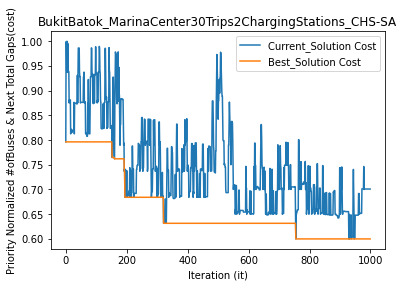

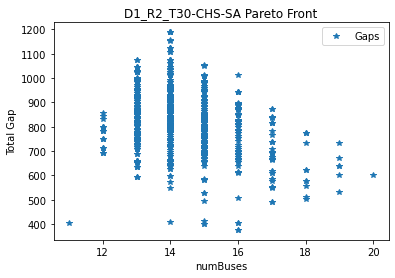

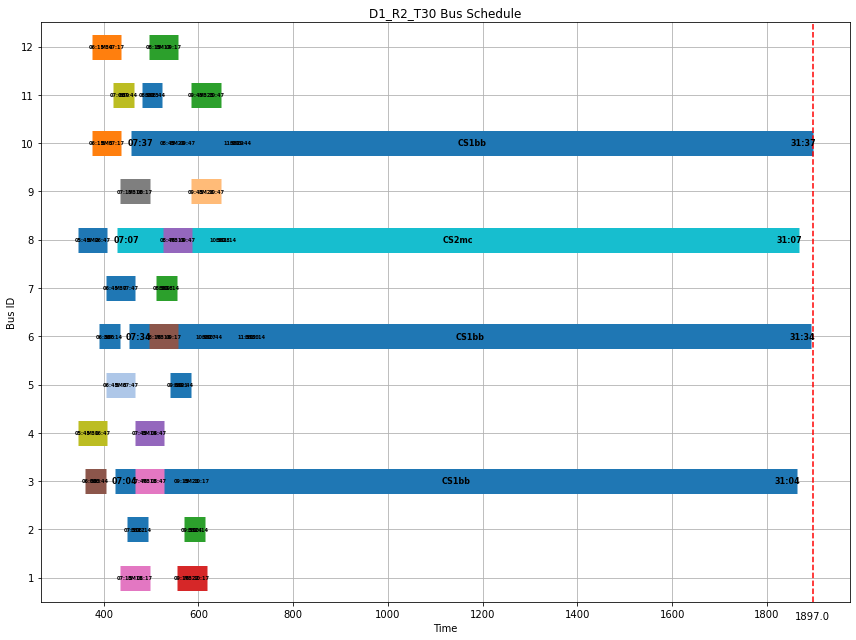

In [68]:
plt.plot(range(it_30_2), costs_30_2, label="Current_Solution Cost")
plt.plot(range(it_30_2), best_costs_30_2, label="Best_Solution Cost")
plt.xlabel("Iteration (it)")
plt.ylabel("Priority Normalized #ofBuses & Next Total Gaps(cost)")
plt.title("BukitBatok_MarinaCenter30Trips2ChargingStations_CHS-SA")
plt.legend(loc="upper right")
plt.savefig("D1_R2_T30.png")
HundredTrips_3cs_df = visualizeSolution(solution_spaces_30_2[1:], "D1_R2_T30-CHS-SA Pareto Front", all_schs, recharge_2cs_arcs)
newdf_D1_R2_T30 = visualizeResult(new_schedule_30_2, all_schs, "D1_R2_T30")

trips_D1_R2_T30 = newdf_D1_R2_T30.copy(deep=True)
trips_D1_R2_T30['next_dep'] = trips_D1_R2_T30.groupby('bus_id')['dep_time'].shift(-1).fillna(0)
trips_D1_R2_T30['difference'] = trips_D1_R2_T30['next_dep'] - trips_D1_R2_T30['arr_time']
trips_D1_R2_T30['difference'] = trips_D1_R2_T30['difference'].apply(lambda x: 0 if x < 0 else x)
trips_soln_D1_R2_T30 = trips_D1_R2_T30.groupby(['bus_id'])['difference'].sum()

chs_D1_R2_T30 = trips_D1_R2_T30.groupby(['bus_id']).agg(
    trips=('trip_id', concat_str),
    numRecharge=('trip_id',countRecharge),
    numTrips=('trip_id', countTrips),
    gapTime=('difference', 'sum')
)
chs_D1_R2_T30.sort_values(['gapTime'], ascending=False)

In [ ]:
cs = recharge_2cs_arcs.keys()

arcs

In [ ]:
n

In [ ]:
durations = {idx: {'duration(mins)': df.loc[idx, 'duration(mins)']} for idx in df.index if idx != 0}
n = len(df)+1 # +1 for depot
cond_mat = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        if i != j:
            cond_mat[i,j] = (i,j) in arcs.keys()
gamma = pd.DataFrame(cond_mat, columns=df.index, index=df.index)
n = len(df)
cond_mat  = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        if (i,j) in arcs:
            cond_mat[i,j] = arcs[(i,j)]['duration']
        else:
            if i != j and ((i in cs and j not in cs) or (i not in cs and j in cs)):
                cond_mat[i,j] = CHARGING_TIME
delta = pd.DataFrame(cond_mat, columns=df.index, index=df.index)
n = len(df)
cond_mat = np.zeros((n * len(cs), n))
for idx, k in enumerate(cs, start=1):
    for i in range(n):
        for j in range(n):
            if (i,j,k) in recharge_2cs_arcs:
#                 print(f"i = {i}... j = {j}... k = {k}... mat = {(k-30-1) * (30+1)+i}... j")
                cond_mat[(k-30-1) * (30+1)+i,j] = (i, j, k) in recharge_arcs

phi = pd.DataFrame(cond_mat, columns=range(n), index=range(n * len(cs)))
# path = r"Y:\\Sentosa\\Optimization_Algos\\"

with pd.ExcelWriter(f"test.xlsx") as writer:
    df.to_excel(writer, sheet_name="main", index=False)
    gamma.to_excel(writer, sheet_name="gamma", index=False)
    delta.to_excel(writer, sheet_name="delta", index=False)
    phi.to_excel(writer, sheet_name="phi", index=False)